In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def data_read():
    name_data = []
    for year in range(1900, 2000):
        with open('D:\PITON\DATA\yob{0}.txt'.format(year)) as f:
            for line in f:
                line = ((line.rstrip()).lower()).split(',')
                line.pop(1)
                name_data.append(line)
    return name_data

In [23]:
def num_name_list(name_data):
    name_list = []
    for nam in name_data:
        if nam[0] not in name_list:
            name_list.append(nam[0])
    return name_list

In [24]:
def name_repeat(name_list, name_data):
    D = {}
    for name in name_list:
        num_repeat = []
        for l in name_data:
            if l[0] == name:
                num_repeat.append(int(l[1]))
        D[name] = sum(num_repeat)
    return D

In [25]:
def name_num_let(D):
    letters = ['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z']
    name_kol_let = {}
    for n in list(D.keys()):
        i = 0
        for let in n:
            if let in letters:
                i += 1
        name_kol_let[n] = i
    return name_kol_let

In [19]:
def get_uniq_name_num_let(name_kol_let):
    num_let = []
    for n in list(name_kol_let.values()):
        if n not in num_let:
            num_let.append(n)
    return num_let

In [20]:
def name_num_let_repeat(D, name_kol_let):
    T = []
    for name in D.keys():
        let_rep = []
        let_rep.append(name_kol_let[name])
        let_rep.append(D[name])
        T.append(let_rep)
    return T

In [8]:
def get_num_let_frequency(num_let, T):
    F = {}
    for num in num_let:
        num_let_repeat = []
        for n in T:
            if n[0] == num:
                num_let_repeat.append(n[1])
        F[num] = sum(num_let_repeat)
    return F

In [11]:
def result():
    name_data = data_read()
    name_list = num_name_list(name_data)
    D = name_repeat(name_list, name_data)
    name_kol_let = name_num_let(D)
    num_let = get_uniq_name_num_let(name_kol_let)
    T = name_num_let_repeat(D, name_kol_let)
    F = get_num_let_frequency(num_let, T)
    DF = {}
    l = []
    f = []
    for i, k in F.items():
        l.append(i)
        f.append(k)
    DF['num_let'] = l
    DF['frequency'] = f
    A = pd.DataFrame(DF)
    return A

    frequency  num_let
0    47497570        2
1    96812169        3
2    35438352        5
3    84023942        4
4     5073360        1
5     3980547        6
6     1752272        8
7      144682        7
8        2926        0
9        1214        9
10        251       11
11        166       10


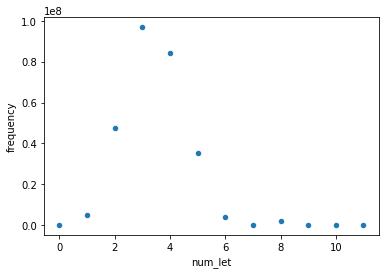

In [31]:
A = result()
print(A)
A.plot.scatter(x='num_let', y='frequency')